In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_raw= pd.read_csv('/content/drive/MyDrive/TFM/Raw_CSV/venues_2023_22_21.csv', sep="	", decimal=".", na_values=['(null)'])
df=df_raw.copy()

<ipython-input-34-a003749bddf2>:1: DtypeWarning: Columns (4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw= pd.read_csv('/content/drive/MyDrive/TFM/Raw_CSV/venues_2023_22_21.csv', sep="	", decimal=".", na_values=['(null)'])


,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,saas_product,first_live_date,latest_live_date,...,is_widget_enabled,is_heavy_saas,first_heavy_saas_date,active_employees,direct_appointments_l30d,online_appointments_l30d,is_tw_mp_listed,tw_mp_listed_first_time_date,marketplace_payment_method,widget_payment_method
0,11000000016,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,tw_connect,2009-07-20 00:00:00,2009-07-20 00:00:00,...,False,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS
1,11000000016,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,tw_connect,2009-07-20 00:00:00,2009-07-20 00:00:00,...,False,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS
2,11000000016,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,tw_connect,2009-07-20 00:00:00,2009-07-20 00:00:00,...,False,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS
3,11000000016,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,tw_connect,2009-07-20 00:00:00,2009-07-20 00:00:00,...,False,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS
4,11000000016,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,tw_connect,2009-07-20 00:00:00,2009-07-20 00:00:00,...,False,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS


In [ ]:
df_raw= pd.read_csv('/content/drive/MyDrive/TFM/Raw_CSV/venues_2023_22_21.csv', sep="	", decimal=".", na_values=['(null)'])
df=df_raw.copy()
df.head()

<ipython-input-2-a003749bddf2>:1: DtypeWarning: Columns (4,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw= pd.read_csv('/content/drive/MyDrive/TFM/Raw_CSV/venues_2023_22_21.csv', sep="	", decimal=".", na_values=['(null)'])


,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,marketplace_payment_method,widget_payment_method,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count
0,11000000003,2008-03-25 12:47:08,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25 00:00:00,...,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84.0,600
1,11000000003,2008-03-25 12:47:08,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25 00:00:00,...,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84.0,1800
2,11000000019,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26 00:00:00,...,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137.0,702
3,11000000019,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26 00:00:00,...,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137.0,2106
4,11000000029,2008-03-25 12:47:10,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-28 00:00:00,...,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.53,129.0,1380


In [ ]:

import datetime
#latest_dt = datetime.date(df_raw['latest_live_date'])
df['latest_live_date'] = pd.to_datetime(df['latest_live_date']).dt.strftime('%Y-%m-%d')
df['latest_live_date'] = pd.to_datetime(df['latest_live_date'])
df['first_live_date'] = pd.to_datetime(df['first_live_date']).dt.strftime('%Y-%m-%d')
df['first_live_date'] = pd.to_datetime(df['first_live_date'])
df['disabled_date'] = pd.to_datetime(df['disabled_date']).dt.strftime('%Y-%m-%d')
df['disabled_date'] = pd.to_datetime(df['disabled_date'])


df['churn2'] = 0
df['churn3'] = 0

#Se va y no vuelve
df.loc[(df['latest_live_date'] - df['disabled_date'])< pd.Timedelta(0),'churn2']=1
df.loc[(df['latest_live_date'] - df['disabled_date'])< pd.Timedelta(0),'churn3']=1

#Se va y vuelve despues de 2 meses / 60 dias
df.loc[(df['latest_live_date'] - df['disabled_date'])> pd.Timedelta(days=60),'churn2']=1


#Se va y vuelve despues de 3 meses / 90 dias
df.loc[(df['latest_live_date'] - df['disabled_date'])> pd.Timedelta(days=90),'churn3']=1

In [ ]:
df.loc[:, :'is_heavy_saas'].head()

,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,latest_live_date,disabled_date,reactivated_status,is_twconnect_migrated,is_purchasable,is_widget_enabled,is_heavy_saas
0,11000000003,2008-03-25,2021-05-26,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25,2008-03-25,2021-04-29,none,False,False,False,NaN
1,11000000003,2008-03-25,2021-05-26,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25,2008-03-25,2021-04-29,none,False,False,False,False
2,11000000019,2008-03-25,2021-05-26,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26,2008-03-26,2016-09-21,none,False,False,False,NaN
3,11000000019,2008-03-25,2021-05-26,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26,2008-03-26,2016-09-21,none,False,False,False,False
4,11000000029,2008-03-25,2021-05-26,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-28,2019-03-06,2019-07-02,none,False,False,False,NaN


In [ ]:
df.loc[:, 'is_heavy_saas':].head()

,is_heavy_saas,first_heavy_saas_date,active_employees,direct_appointments_l30d,online_appointments_l30d,is_tw_mp_listed,tw_mp_listed_first_time_date,marketplace_payment_method,widget_payment_method,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,mmyyyy_created,churn2,churn3
0,NaN,NaN,NaN,NaN,NaN,True,2020-09-30,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84.0,600,2008-03,1,1
1,False,NaN,NaN,0.0,0.0,True,2020-09-30,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84.0,1800,2008-03,1,1
2,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137.0,702,2008-03,1,1
3,False,NaN,NaN,0.0,0.0,True,2021-05-12,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137.0,2106,2008-03,1,1
4,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,PREPAY_ONLY,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.53,129.0,1380,2008-03,1,1


In [ ]:
#Transformación a fecha
df['created'] = pd.to_datetime(df['created']).dt.strftime('%Y-%m-%d')
df['created']= pd.to_datetime(df['created'])

df['updated'] = pd.to_datetime(df['updated']).dt.strftime('%Y-%m-%d')
df['updated']= pd.to_datetime(df['updated'])

df['venue_active_from'] = pd.to_datetime(df['venue_active_from']).dt.strftime('%Y-%m-%d')
df['venue_active_from']= pd.to_datetime(df['venue_active_from'])



# Created date

   N_created_by_venue  n_venues
0                   1    198935
 
 Primera venue creada fue en 2008-03-25 00:00:00 y la ultima venue creada fue 2023-06-01 00:00:00
    created       0
0         1  110416
1         2  120214
2         3  142212
3         4   84112
4         5  114972
5         6   94473
6         7   89782
7         8   77571
8         9  105009
9        10  121959
10       11  150786
11       12  111791


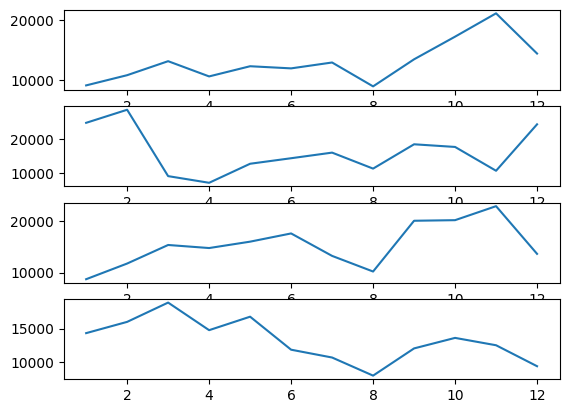

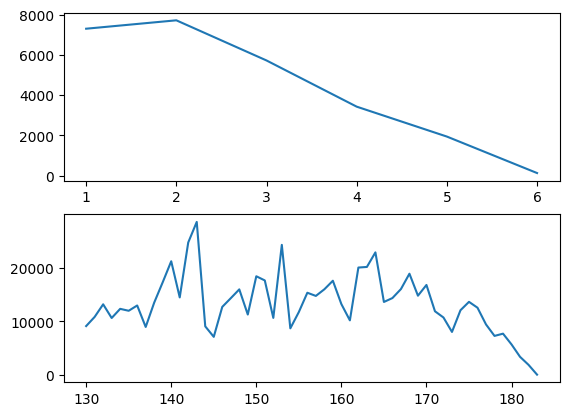

In [ ]:
#verificar que cada venue tiene 1 created
created_conte1= df.groupby('unique_venue_id')['created'].nunique().sort_values(ascending=False)
created_conte2=created_conte1.reset_index().groupby('created')['unique_venue_id'].count().reset_index().sort_values(['created'], ascending=True)
created_conte2.columns=['N_created_by_venue' , 'n_venues']

print(created_conte2.head())

#min created
print(f' \n Primera venue creada fue en {df.created.min()} y la ultima venue creada fue {df.created.max()}')


mescreated_conteo= df.groupby(df['created'].dt.month).size().reset_index()
print(mescreated_conteo)
#df.groupby('created')['created'].nunique().sort_values(ascending=False)

#por mes y año
df['mmyyyy_created'] = df['created'].dt.to_period('M')
venues_por_mes_y_anio = df.groupby(df['mmyyyy_created']).size().reset_index()
venues_por_mes_y_anio.columns=['mmyyyy_created' , 'freq']
venues_por_mes_y_anio.T

fig, ax = plt.subplots(4,1) #2019, 2020, 2021, 2022, 2023
#plt.title("venues creadas por años")
ax[0].plot(range(1,13), venues_por_mes_y_anio.iloc[130:142,1] )#2019
ax[1].plot(range(1,13), venues_por_mes_y_anio.iloc[142:154,1] )#2020
ax[2].plot(range(1,13), venues_por_mes_y_anio.iloc[154:166,1] )#2021
ax[3].plot(range(1,13), venues_por_mes_y_anio.iloc[166:178,1] )#2022
plt.show()
print(' ')
fig, ax = plt.subplots(2,1) #2023 y completo
ax[0].plot(range(1,7), venues_por_mes_y_anio.iloc[178:184,1] )#2023
ax[1].plot( venues_por_mes_y_anio.iloc[130:184,1] )# 2019 al 2023
#plt.title("venues creadas en 2023 y venues creadas desde el 2019")
plt.show()
print(' ')

# Updated date

In [ ]:
#verificar cuantas updated tiene cada venue
updated_conte1= df.groupby('unique_venue_id')['updated'].nunique().sort_values(ascending=False)
updated_conte2=updated_conte1.reset_index().groupby('updated')['unique_venue_id'].count().reset_index().sort_values(['updated'], ascending=True)
updated_conte2.columns=['N_updated_by_venue' , 'n_venues']

print(updated_conte2.head())

#min created
print(f' \n Primer updated fue en {df.updated.min()} y el ultimo fue {df.updated.max()}')



   N_updated_by_venue  n_venues
0                   0       192
1                   1    131358
2                   2      5970
3                   3     15323
4                   4      4387
 
 Primer updated fue en 2021-05-26 00:00:00 y el ultimo fue 2023-06-01 00:00:00


# Venue_Status

In [ ]:
df['venue_status'].value_counts(dropna=False)

LIVE        551822
NaN         414765
DISABLED    303953
PENDING      28704
ARCHIVED     24053
Name: venue_status, dtype: int64

In [ ]:

#verificar cuantas  status tiene cada venue
status_conte1= df.groupby('unique_venue_id')['venue_status'].nunique().sort_values(ascending=False)
status_conte2=status_conte1.reset_index().groupby('venue_status')['unique_venue_id'].count().reset_index().sort_values(['venue_status'], ascending=True)
status_conte2.columns=['N_status_by_venue' , 'n_venues']

print(status_conte2.head())

   N_status_by_venue  n_venues
0                  0     10463
1                  1    181667
2                  2      6620
3                  3       185


La variable status es un resultado de cuando deja de pagar o esta nulo en muchos casos.

# Country 

In [ ]:
df.groupby('country_code')['unique_venue_id'].nunique().sort_values(ascending=False)

country_code
GB    100349
ES     20848
IT     19476
DE     16246
FR     16223
NL      8039
BE      3170
LT      2990
AT      2742
GR      2692
CH      2562
IE      1869
PT      1693
SI        31
DK         4
LV         1
Name: unique_venue_id, dtype: int64

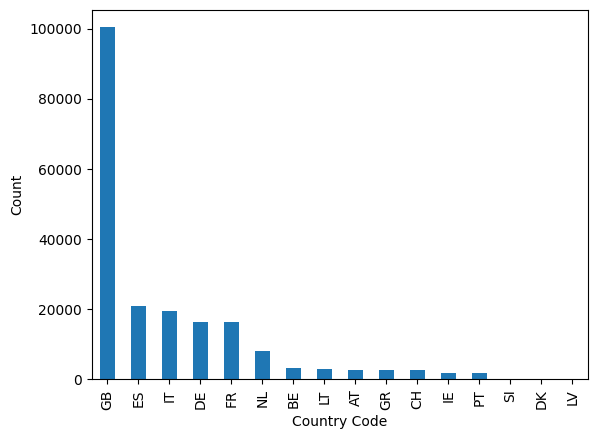

In [ ]:
#cada venue tiene un country
country_conte1= df.groupby('unique_venue_id')['country_code'].nunique().sort_values(ascending=False)

#distribucion por pais
country_conte12= df.groupby('country_code')['unique_venue_id'].nunique().sort_values(ascending=False)
ax=country_conte12.plot.bar()
ax.set_xlabel('Country Code')
ax.set_ylabel('Count')
plt.show()

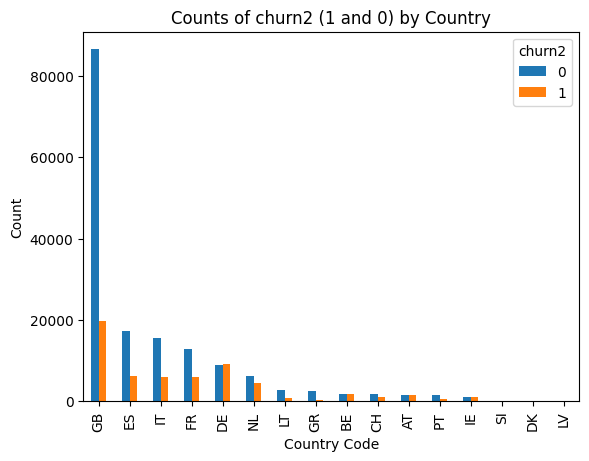

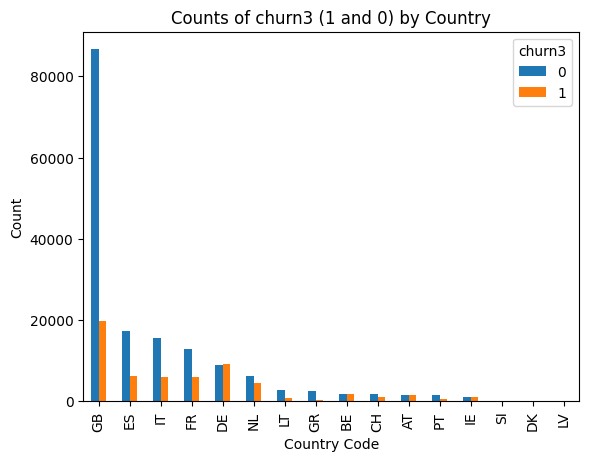

In [ ]:

# Agrupar los datos por país y churn2, contar los valores y desplegar en un gráfico de barras
grouped_2 = df.groupby(['country_code', 'churn2'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['country_code'])
grouped_3 = df.groupby(['country_code', 'churn3'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['country_code'])

#fig, ax = plt.subplots(2, 1,)
ax[0] = grouped_2.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[0].set_xlabel('Country Code')
ax[0].set_ylabel('Count')
ax[0].set_title('Counts of churn2 (1 and 0) by Country')

ax[1] = grouped_3.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[1].set_xlabel('Country Code')
ax[1].set_ylabel('Count')
ax[1].set_title('Counts of churn3 (1 and 0) by Country')

plt.show()

# Saas Product

In [ ]:
df['saas_product'].value_counts(dropna=False)

tw_connect    664245
tw_pro        659052
Name: saas_product, dtype: int64

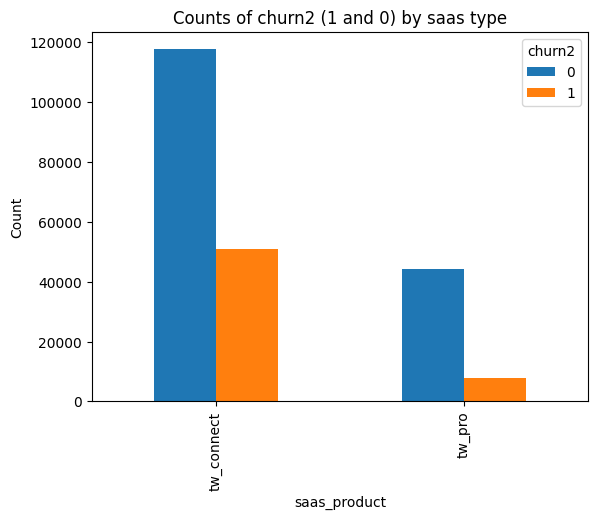

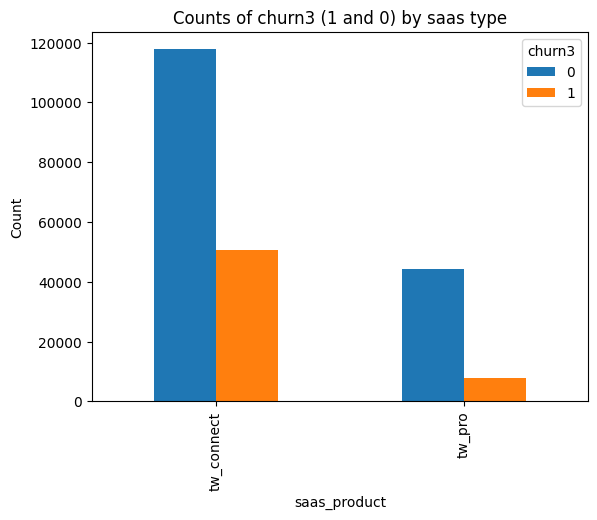

In [ ]:
# Agrupar los datos por país y churn2, contar los valores y desplegar en un gráfico de barras
grouped_2 = df.groupby(['saas_product', 'churn2'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['saas_product'])
grouped_3 = df.groupby(['saas_product', 'churn3'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['saas_product'])

#fig, ax = plt.subplots(2, 1,)
ax[0] = grouped_2.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[0].set_xlabel('saas_product')
ax[0].set_ylabel('Count')
ax[0].set_title('Counts of churn2 (1 and 0) by saas type')

ax[1] = grouped_3.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[1].set_xlabel('saas_product')
ax[1].set_ylabel('Count')
ax[1].set_title('Counts of churn3 (1 and 0) by saas type')

plt.show()

# Tier

In [ ]:
df['tier'].value_counts(dropna=False)

Tier 1    574063
NaN       545375
Tier 2    203859
Name: tier, dtype: int64

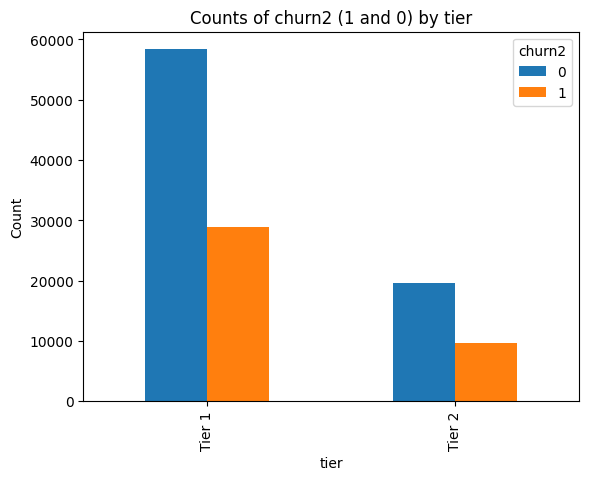

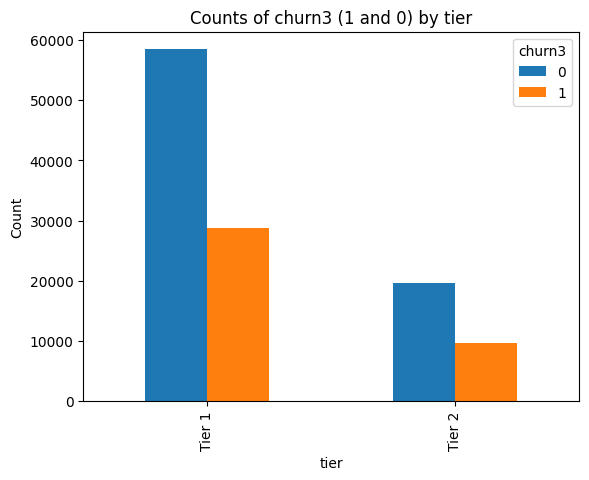

In [ ]:
# Agrupar los datos por país y churn2, contar los valores y desplegar en un gráfico de barras
grouped_2 = df.groupby(['tier', 'churn2'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['tier'])
grouped_3 = df.groupby(['tier', 'churn3'])['unique_venue_id'].nunique().unstack().reset_index().sort_values(by=[0], ascending=False).set_index(['tier'])

#fig, ax = plt.subplots(2, 1,)
ax[0] = grouped_2.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[0].set_xlabel('tier')
ax[0].set_ylabel('Count')
ax[0].set_title('Counts of churn2 (1 and 0) by tier')

ax[1] = grouped_3.plot.bar()
# Configurar etiquetas de los ejes y título del gráfico
ax[1].set_xlabel('tier')
ax[1].set_ylabel('Count')
ax[1].set_title('Counts of churn3 (1 and 0) by tier')

plt.show()

# Original Marketplace Venue Type Name

In [ ]:
df['original_marketplace_venue_type_name'].value_counts(dropna=False)

Hair Salon                   492160
Beauty Salon                 459529
NaN                           74162
Wellness Centre               54414
Massage & Therapy Centre      54226
Nail Salon                    53400
Treatment Room - Beauty       20429
Home-based Venue              17418
Fitness Centre                17008
Skin Clinic                   14074
Barbershop                    11678
Day Spa                       10422
Mobile Beauty                  9330
Waxing Salon                   8548
Treatment Room - Wellness      3690
Medical Spa                    3410
Hotel Spa                      3288
Tanning Salon                  3224
Dental Clinic                  3160
Makeup Studio                  2042
Mobile Massage                 1993
Weight Loss Clinic             1848
Brow Bar                       1634
Yoga Studio                     706
Treatment Room - Spa            341
Destination Spa                 337
Pilates Studio                  336
Chiropractic Clinic         

In [ ]:
#cuantos tipos de market tiene por venue
market_conte1= df.groupby('unique_venue_id')['original_marketplace_venue_type_name'].nunique().sort_values(ascending=False)

market_conte2=market_conte1.reset_index().groupby('original_marketplace_venue_type_name')['unique_venue_id'].count().reset_index().sort_values(['original_marketplace_venue_type_name'], ascending=True)
status_conte2.columns=['N_market_by_venue' , 'n_venues']
status_conte2

,N_market_by_venue,n_venues
0,0,10463
1,1,181667
2,2,6620
3,3,185


Se analiza que 185 venues tienen 3 markets distintos

In [ ]:
#Existen venues que tengan valores nulos y otros no nulos? Resp: No
aa= market_conte1.reset_index()
aa.loc[aa['original_marketplace_venue_type_name']>1,:]
pd.merge(aa.loc[aa['original_marketplace_venue_type_name']>1,:], df.loc[df.original_marketplace_venue_type_name.isnull(), :] , on='unique_venue_id', how='inner')

,unique_venue_id,original_marketplace_venue_type_name_x,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name_y,country_code,tier,saas_product,...,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,mmyyyy_created,churn2,churn3


# venue_active_from

In [ ]:
df['venue_active_from'].value_counts(dropna=False)

NaT           970470
2020-03-31     23238
2021-06-30     10516
2020-05-31     10111
2021-12-31      9246
               ...  
2023-05-12         3
2023-04-08         2
2023-04-07         2
2023-05-06         1
2023-05-19         1
Name: venue_active_from, Length: 931, dtype: int64

In [ ]:
#verificar que cada venue tiene 1 created
active_conte1= df.groupby('unique_venue_id')['venue_active_from'].nunique().sort_values(ascending=False)
active_conte2=active_conte1.reset_index().groupby('venue_active_from')['unique_venue_id'].count().reset_index().sort_values(['venue_active_from'], ascending=True)
active_conte2.columns=['N_active_by_venue' , 'n_venues']
active_conte2


,N_active_by_venue,n_venues
0,0,178462
1,1,20473


In [ ]:
active_conte1

unique_venue_id
12000028196    1
12000032893    1
12000032883    1
12000032884    1
12000032887    1
              ..
11000285452    0
11000285453    0
11000285454    0
11000285455    0
13026416403    0
Name: venue_active_from, Length: 198935, dtype: int64

In [ ]:
df.loc[df.venue_active_from.isnull(), :'is_heavy_saas':]
df.loc[df.unique_venue_id==13026416403    , :'is_heavy_saas':]

,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,latest_live_date,disabled_date,reactivated_status,is_twconnect_migrated,is_purchasable,is_widget_enabled,is_heavy_saas
1271639,13026416403,2017-03-02,2022-01-31,DISABLED,NaT,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,2019-05-22,2022-01-01,none,True,False,False,False
1271640,13026416403,2017-03-02,2023-05-30,DISABLED,NaT,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,2023-06-01,2022-01-01,reactivated new,True,False,False,False


In [ ]:
#Testeando
subset_aux= df_raw[['unique_venue_id' , 'first_live_date', 'latest_live_date', 'disabled_date', 'churn2', 'churn3']]
subset_aux.head(10)

,unique_venue_id,first_live_date,latest_live_date,disabled_date
0,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
1,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
2,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
3,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
4,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
5,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
6,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
7,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
8,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN
9,11000000016,2009-07-20 00:00:00,2009-07-20 00:00:00,NaN


In [ ]:
subset_aux.sample(10)

In [ ]:
aux= df.loc[df['disabled_date'].notnull(),['unique_venue_id' , 'first_live_date', 'latest_live_date', 'disabled_date']]
aux


,unique_venue_id,first_live_date,latest_live_date,disabled_date
24,11000000048,2008-03-28,2008-03-28,2017-02-28
25,11000000048,2008-03-28,2008-03-28,2017-02-28
26,11000000048,2008-03-28,2008-03-28,2017-02-28
27,11000000048,2008-03-28,2008-03-28,2017-02-28
28,11000000048,2008-03-28,2008-03-28,2017-02-28
...,...,...,...,...
4434749,12000002200,2017-12-01,2017-12-01,2018-02-01
4434750,12000002200,2017-12-01,2017-12-01,2018-02-01
4434751,12000002200,2017-12-01,2017-12-01,2018-02-01
4434752,12000002200,2017-12-01,2017-12-01,2018-02-01


In [ ]:
df['churn2'].value_counts()

0    3256321
1    1178457
Name: churn2, dtype: int64

In [ ]:
df['churn3'].value_counts()

0    3260768
1    1174010
Name: churn3, dtype: int64

In [ ]:
#Differencia entre 3 meses y 2 meses son 4447 casos
df.loc[(df['churn3'] != df['churn2']),['unique_venue_id' , 'first_live_date', 'latest_live_date', 'disabled_date', 'churn2', 'churn3']]

,unique_venue_id,first_live_date,latest_live_date,disabled_date,churn2,churn3
19171,11000003063,2009-01-22,2017-12-06,2017-09-14,1,0
19172,11000003063,2009-01-22,2017-12-06,2017-09-14,1,0
19173,11000003063,2009-01-22,2017-12-06,2017-09-14,1,0
19174,11000003063,2009-01-22,2017-12-06,2017-09-14,1,0
19175,11000003063,2009-01-22,2017-12-06,2017-09-14,1,0
...,...,...,...,...,...,...
4430789,12000000924,2017-07-01,2017-10-01,2017-08-01,1,0
4430790,12000000924,2017-07-01,2017-10-01,2017-08-01,1,0
4430791,12000000924,2017-07-01,2017-10-01,2017-08-01,1,0
4430792,12000000924,2017-07-01,2017-10-01,2017-08-01,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434778 entries, 0 to 4434777
Data columns (total 24 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   unique_venue_id                       int64         
 1   created                               object        
 2   updated                               object        
 3   venue_status                          object        
 4   venue_active_from                     object        
 5   original_marketplace_venue_type_name  object        
 6   country_code                          object        
 7   saas_product                          object        
 8   first_live_date                       datetime64[ns]
 9   latest_live_date                      datetime64[ns]
 10  disabled_date                         datetime64[ns]
 11  reactivated_status                    object        
 12  is_twconnect_migrated                 bool          
 13  is_purchasab

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323297 entries, 0 to 1323296
Data columns (total 33 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   unique_venue_id                       1323297 non-null  int64  
 1   created                               1323297 non-null  object 
 2   updated                               943956 non-null   object 
 3   venue_status                          908532 non-null   object 
 4   venue_active_from                     352827 non-null   object 
 5   original_marketplace_venue_type_name  1249135 non-null  object 
 6   country_code                          1323297 non-null  object 
 7   tier                                  777922 non-null   object 
 8   saas_product                          1323297 non-null  object 
 9   first_live_date                       1142520 non-null  object 
 10  latest_live_date                      1135725 non-null

In [ ]:
#ux= aux.loc[aux['latest_live_date'].notnull(),:]

df['churn2'] = 0
df['churn3'] = 0

#Se va y no vuelve
df.loc[(df['latest_live_date'] - df['disabled_date'])< pd.Timedelta(0),'churn2']=1
df.loc[(df['latest_live_date'] - df['disabled_date'])< pd.Timedelta(0),'churn3']=1

#Se va y vuelve despues de 2 meses / 60 dias
df.loc[(df['latest_live_date'] - df['disabled_date'])> pd.Timedelta(days=60),'churn2']=1


#Se va y vuelve despues de 3 meses / 90 dias
df.loc[(df['latest_live_date'] - df['disabled_date'])> pd.Timedelta(days=90),'churn3']=1


In [ ]:
#from testing
df.loc[(df['latest_live_date'] - df['disabled_date'])< pd.Timedelta(0),['unique_venue_id' , 'first_live_date', 'latest_live_date', 'disabled_date']]

In [ ]:
df_raw.describe(include='O').transpose()

,count,unique,top,freq
created,4434778,180985,2008-03-25 12:47:16,1944
updated,3567184,133285,2021-05-26 11:47:58,16461
venue_status,3536439,4,DISABLED,2498623
venue_active_from,198610,940,2020-03-31 22:00:00,7224
original_marketplace_venue_type_name,4210778,29,Hair Salon,1411810
country_code,4434778,16,GB,2372008
saas_product,4434778,2,tw_connect,3613344
first_live_date,3405699,4795,2010-03-19 00:00:00,438327
latest_live_date,3386162,4781,2010-03-19 00:00:00,409658
disabled_date,1209709,3012,2022-02-02 00:00:00,25798


# Ejemplo 1
En que momento se fue y en que momento volvio? los 1 y 0 deberian representar eso

In [ ]:
#ejemplo
df.loc[df.unique_venue_id== 11000373610, :'is_heavy_saas']

#df.columns

,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,latest_live_date,disabled_date,reactivated_status,is_twconnect_migrated,is_purchasable,is_widget_enabled,is_heavy_saas
350064,11000373610,2017-10-17,NaT,NaN,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-25,2020-02-03,2019-05-20,none,False,NaN,NaN,NaN
350065,11000373610,2017-10-17,NaT,NaN,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-25,2020-02-03,2019-05-20,none,False,NaN,NaN,False
350066,11000373610,2017-10-17,NaT,NaN,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-25,2020-02-04,2019-05-20,none,False,NaN,NaN,False
350067,11000373610,2017-10-17,NaT,NaN,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-25,2020-02-04,2019-05-20,none,False,NaN,NaN,False
350068,11000373610,2017-10-17,2022-03-04,LIVE,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2019-05-21,reactivated new,False,True,True,False
350069,11000373610,2017-10-17,2022-03-04,LIVE,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2019-05-21,reactivated new,False,True,True,False
350070,11000373610,2017-10-17,2022-03-04,LIVE,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2019-05-21,reactivated new,False,True,True,False
350071,11000373610,2017-10-17,2022-03-04,LIVE,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2019-05-21,reactivated new,False,True,True,False
350072,11000373610,2017-10-17,2022-08-01,DISABLED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2022-08-02,none,False,False,False,False
350073,11000373610,2017-10-17,2022-09-08,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,2020-02-04,2022-09-09,none,False,False,False,False


In [ ]:
df.loc[df.unique_venue_id== 11000373610, 'is_heavy_saas':]

,is_heavy_saas,first_heavy_saas_date,active_employees,direct_appointments_l30d,online_appointments_l30d,is_tw_mp_listed,tw_mp_listed_first_time_date,marketplace_payment_method,widget_payment_method,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,mmyyyy_created,churn2,churn3
350064,NaN,NaN,NaN,NaN,NaN,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,444,2017-10,1,1
350065,False,NaN,1.0,0.0,4.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350066,False,NaN,1.0,0.0,4.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350067,False,NaN,1.0,0.0,10.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350068,False,NaN,1.0,0.0,4.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,148,2017-10,1,1
350069,False,NaN,1.0,0.0,3.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350070,False,NaN,1.0,0.0,1.0,True,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350071,False,NaN,1.0,0.0,2.0,False,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350072,False,NaN,NaN,0.0,0.0,False,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,74,2017-10,1,1
350073,False,NaN,NaN,0.0,0.0,False,2021-05-12,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,4.9,40.0,666,2017-10,1,1


# Ejemplo 2

Esta disabled o reactivated?

In [ ]:
df.loc[df.unique_venue_id==13026416403    , :'is_heavy_saas']

,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,latest_live_date,disabled_date,reactivated_status,is_twconnect_migrated,is_purchasable,is_widget_enabled,is_heavy_saas
1271639,13026416403,2017-03-02,2022-01-31,DISABLED,NaT,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,2019-05-22,2022-01-01,none,True,False,False,False
1271640,13026416403,2017-03-02,2023-05-30,DISABLED,NaT,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,2023-06-01,2022-01-01,reactivated new,True,False,False,False


In [ ]:
df.loc[df.unique_venue_id==13026416403    , 'is_heavy_saas':]

,is_heavy_saas,first_heavy_saas_date,active_employees,direct_appointments_l30d,online_appointments_l30d,is_tw_mp_listed,tw_mp_listed_first_time_date,marketplace_payment_method,widget_payment_method,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,mmyyyy_created,churn2,churn3
1271639,False,NaN,NaN,0.0,0.0,False,NaN,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1840,2017-03,1,1
1271640,False,NaN,NaN,0.0,0.0,False,2023-06-01,ALL_METHODS,ALL_METHODS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,115,2017-03,1,1
